In [19]:
import json
import matplotlib.pyplot as plt

In [4]:
def load_people_json(filename):
    with open(filename, "r", encoding="utf-8") as f:
        return [json.loads(line) for line in f]

In [5]:
json_data = load_people_json("data/cleaned.json") #load data

In [8]:
print(json_data[0].keys())

dict_keys(['name', 'timestamp', 'intro', 'interval_start', 'interval_end', 'gender'])


In [10]:
gendered_words = {
    "family_roles": [
        "wife", "husband", "mother", "father", "daughter", "son", "children",
        "family", "spouse", "married", "sister", "brother", "partner", "mrs"
    ],
    "gender_identity": [
        "woman", "female", "man", "male", "women", "she", "he", "her", "his"
    ],
    "other_gendered": [
        "lady", "housewife", "widow", "girl"
    ]
}

prestige_words = {
    "awards": [
        "nobel", "prize", "medal", "awarded", "honorary", "laureate", "won", "awards"
    ],
    "recognition": [
        "famous", "best", "noted", "renowned", "honor", "recognition", "prestigious"
    ],
    "innovation": [
        "discovery", "discovered", "developed", "inventor",
        "contributions", "achievements", "pioneering", "pioneer",
        "founder", "leading", "breakthrough"
    ],
    "authority": [
        "published", "director", "president", "chairman", "fellow", "academy", "influential"
    ]
}

In [14]:


def get_word_count(text, words):
    '''counts the number of occurances of words in text'''
    word_set = set(word.lower() for word in words) # convert to set
    tokens = text.lower().split()
    count = 0
    for token in tokens:
        if token in word_set:
            count += 1
    
    return count

testing_text = "She was the daughter of the great Heisenberg. They got married in June."

get_word_count(testing_text, gendered_words["family_roles"]) # should print 2


2

In [67]:
def analyse(gender, word_list):
    '''
        counts the occurance of words given in word_list across time
        returns:
            a list with with size 84, every 3 month from 2005
    '''
    
    bins = [0] * 84


    for entry in json_data:
        if entry['gender'] == gender:

            ts = entry['timestamp']  # [year, month, day, hour, ...]
            year, month = ts[0], ts[1]
            idx = (year - 2005) * 4 + (month // 3)
            intro = entry['intro']
            count = get_word_count(intro, word_list)
            bins[idx] += count
    return bins



In [ ]:
# now lets analyse and plot 

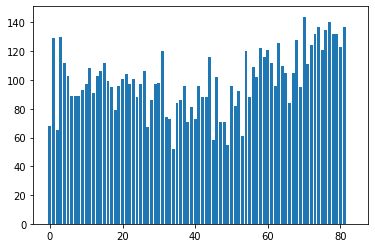

In [79]:
y = analyse('female', gendered_words["family_roles"])
plt.bar(range(len(y)), y)
plt.show()

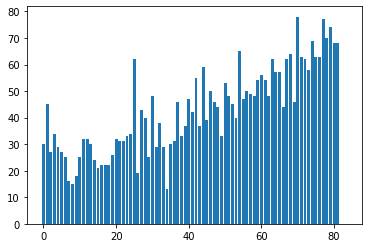

In [63]:
# family role words seemed pretty random, let's try one word about awards

y = analyse('female', ["nobel"])
plt.bar(range(len(y)), y)
plt.show()

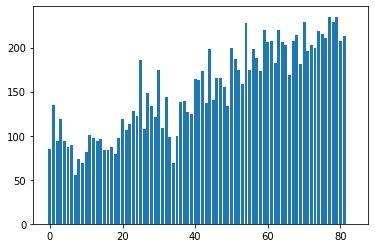

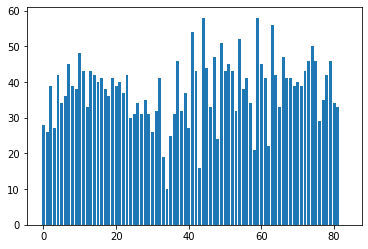

In [64]:
# Interesting 🧐 now some trends can be seen, also to note Nobel prizes are not awarded posthumously
# so it's all about reporting

# let's try to analyse all prestige_words["awards"] and see if trend is same among females and males
y_f = analyse('female', prestige_words["awards"])
y_m = analyse('male', prestige_words["awards"])

plt.bar(range(len(y_f)), y_f)
plt.show()

plt.bar(range(len(y_m)), y_m)
plt.show()

In [47]:
# no similar strong pattern in males, 
# this reveals how reporting about awards has changed during 21st century
# but could this also be just about how long the intros are? longer intros = more words and more occurances..

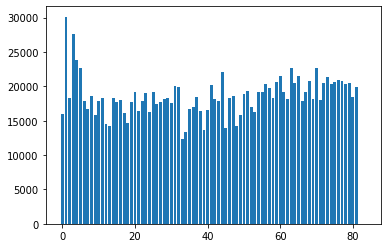

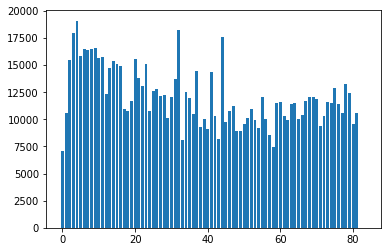

In [82]:
def intro_lengths(gender):
    '''Returns total intro lengths per quarter for given gender.'''
    bins = [0] * 84

    for entry in json_data:
        if entry['gender'] == gender:
            ts = entry['timestamp']
            year, month = ts[0], ts[1]
            idx = (year - 2005) * 4 + (month // 3)
            intro = entry['intro']
            bins[idx] += len(intro.split())

    return bins

y_len_f = intro_lengths('female')
plt.bar(range(len(y_len_f)), y_len_f)
plt.show()

y_len_m = intro_lengths('male')
plt.bar(range(len(y_len_m)), y_len_m)
plt.show()

In [74]:
# although not much change in intro lengths except in males, 
# lets do another func that also normalises based on intro len to make sure 
# it doesnt affect results

def analyse_normalised(gender, word_list):
    '''
        counts the occurrence of words given in word_list across time,
        normalizes by intro length (words per intro), and returns:
        a list with size 84 (every 3 months from 2005)
    '''
    
    bins = [0] * 84
    total_intros = [0] * 84  # Keep track of the number of intros for averaging

    for entry in json_data:
        if entry['gender'] == gender:

            ts = entry['timestamp']  # [year, month, day, hour, ...]
            year, month = ts[0], ts[1]
            idx = (year - 2005) * 4 + (month // 3)
            intro = entry['intro']
            intro_length = len(intro.split())  # Number of words in intro
            count = get_word_count(intro, word_list)

            # Normalize by intro length (if intro length is non-zero)
            if intro_length > 0:
                bins[idx] += count / intro_length
                total_intros[idx] += 1

    # Average by intro count (if any intros were found in a quarter)
    for i in range(len(bins)):
        if total_intros[i] > 0:
            bins[i] /= total_intros[i]

    return bins


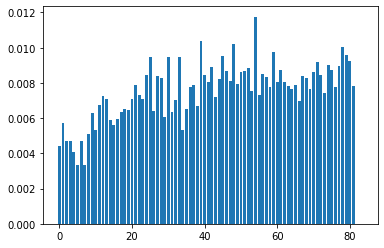

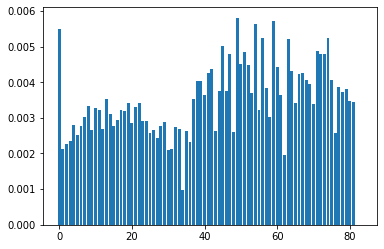

In [84]:
wl = prestige_words["awards"]

y_f = analyse_normalised('female', wl)
plt.bar(range(len(y_f)), y_f)
plt.show()

y_m = analyse_normalised('male', wl)
plt.bar(range(len(y_m)), y_m)
plt.show()

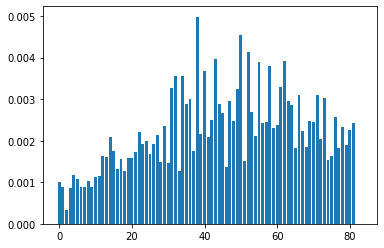

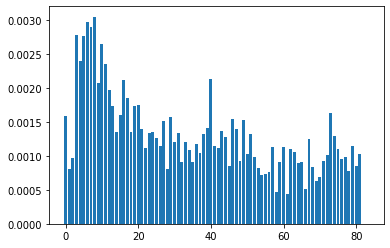

In [85]:
# normalised difference not so significant anymore, lets try another

wl = prestige_words["recognition"]

y_f = analyse_normalised('female', wl)
plt.bar(range(len(y_f)), y_f)
plt.show()

y_m = analyse_normalised('male', wl)
plt.bar(range(len(y_m)), y_m)
plt.show()

In [73]:
# INTERESTING, STRONG TREND
# let's keep going

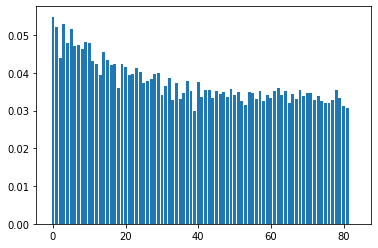

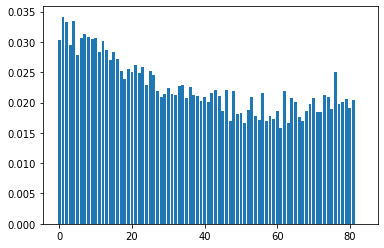

In [77]:
wl = gendered_words["gender_identity"]

y_f = analyse_normalised('female', wl)
plt.bar(range(len(y_f)), y_f)
plt.show()

y_m = analyse_normalised('male', wl)
plt.bar(range(len(y_m)), y_m)
plt.show()

In [ ]:
# another trend seen